## Gagan Chordia

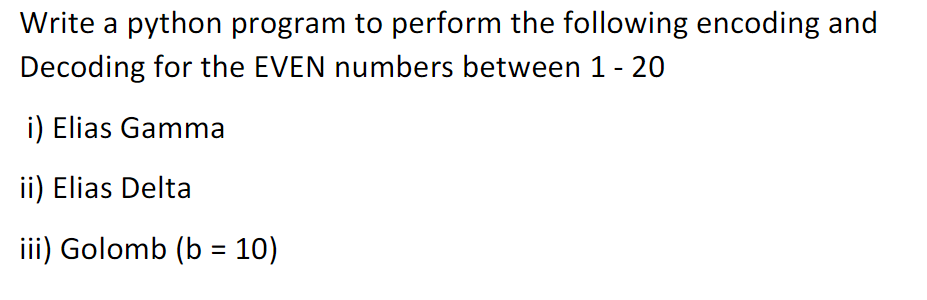

In [1]:
from math import floor, log, pow

In [2]:
l = []
for x in range (1,21):
    if x % 2 == 0:
        l.append(x)
l

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [3]:
def to_binary(x):
    bin = "{0:b}".format(int(x))
    bin_without_msb = bin[1:]
    return bin_without_msb

In [4]:
#Elias Gamma

def elias_gamma_encoding(x):
    if(x == 0):
        return '0'
    n = 1 + floor(log(x, 2))
    unary = (n - 1) * '0' + '1'
    return (unary + to_binary(x))

In [5]:
gamma_encode = dict()

for x in l:
    gamma_encode[x] = elias_gamma_encoding(x)

print('Elias Gamma Encoding')
print(gamma_encode)

Elias Gamma Encoding
{2: '010', 4: '00100', 6: '00110', 8: '0001000', 10: '0001010', 12: '0001100', 14: '0001110', 16: '000010000', 18: '000010010', 20: '000010100'}


In [6]:
def elias_gamma_decoding(x):
    x = list(x)
    k = 0
    while True:
        if not x[k] == '0':
            break
        k = k + 1
    
    x = x[k : 2 * k + 1]
    n = 0
    x.reverse()
    
    for i in range(len(x)):
        if x[i] == '1':
            n += pow(2, i)
    
    return int(n)

In [7]:
gamma_decode = dict()
temp = list(gamma_encode.values())

for x in temp:
    gamma_decode[x] = elias_gamma_decoding(x)
    
print('Elias Gamma Decoding')
print(gamma_decode)

Elias Gamma Decoding
{'010': 2, '00100': 4, '00110': 6, '0001000': 8, '0001010': 10, '0001100': 12, '0001110': 14, '000010000': 16, '000010010': 18, '000010100': 20}


In [8]:
#Elias Delta

def elias_delta_encoding(x):
    gamma = elias_gamma_encoding(1 + log(x, 2))
    binary = to_binary(x)
    return (gamma + binary)

In [9]:
delta_encode = dict()

for x in l:
    delta_encode[x] = elias_delta_encoding(x)
    
print('Elias Delta Encoding')
print(delta_encode)

Elias Delta Encoding
{2: '0100', 4: '01100', 6: '01110', 8: '00100000', 10: '00100010', 12: '00100100', 14: '00100110', 16: '001010000', 18: '001010010', 20: '001010100'}


In [10]:
def elias_delta_decoding(x):
    x = list(x)
    k = 0
    while True:
        if not x[k] == '0':
            break
        k = k + 1
    
    x = x[2*k+1:]
    n = 0
    x.insert(0, '1')
    x.reverse()
    
    for i in range(len(x)):
        if x[i] == '1':
            n += pow(2, i)
    
    return int(n)

In [11]:
delta_decode = dict()
temp = list(delta_encode.values())

for x in temp:
    delta_decode[x] = elias_delta_decoding(x)
    
print('Elias Delta Decoding')
print(delta_decode)

Elias Delta Decoding
{'0100': 2, '01100': 4, '01110': 6, '00100000': 8, '00100010': 10, '00100100': 12, '00100110': 14, '001010000': 16, '001010010': 18, '001010100': 20}


In [12]:
#Golumb

def golomb_encoding(x, b):
    q = x // b
    r = x % b
    qu = q * '0' + '1'
    
    z = floor(log(b, 2))
    k = 2**(z + 1) - b
    
    if r < k:
        rem = bin(r)[2:]
        l = len(rem)
        
        if l < z:
            rem = (z - l) * '0' + rem
    else:
        rem = bin(r + k)[2:]
        l = len(rem)
        
        if l < z + 1:
            rem = (b - l + 1) * '0' + rem
    
    return qu + rem

In [13]:
golomb_encode = dict()

b = 10 # from the question

for x in l:
    golomb_encode[x] = golomb_encoding(x, b)

print('Golomb Encoding')
print(golomb_encode)

Golomb Encoding
{2: '1010', 4: '1100', 6: '11100', 8: '11110', 10: '01000', 12: '01010', 14: '01100', 16: '011100', 18: '011110', 20: '001000'}


In [14]:
def bin_to_int(x):
    num = 0
    for i in range(len(x)):
        num += (int(x[len(x) - i - 1]) * pow(2, i))
    return num

In [15]:
def golomb_decoding(x):
    x = list(x)
    b = 10 #from question
    i = floor(log(b, 2))
    d = pow(2, i + 1) - b
    
    temp = 0
    l = 1
    
    while(temp < len(x)):
        t = 0
        flag = False
        r = []
        k = i
        q = 0
        
        for j in range(temp, len(x)):
            if(x[j] == '0' and not flag):
                t += 1
                continue
            
            if(x[j] == '1' and not flag):
                q = t
                flag = True
                continue
                
            r.append(x[j])
            
            k -= 1
            
            if(k == 0):
                rnum = bin_to_int(r)
                if(rnum < d):
                    temp = j + 1
                    break
                
            if(k == -1):
                rnum = bin_to_int(r)
                rnum = rnum - d
                temp = j + 1
                break
        res = q * b + rnum
        l = 0
    return int(res)

In [16]:
golomb_decode = dict()
temp = list(golomb_encode.values())

for x in temp:
    golomb_decode[x] = golomb_decoding(x)
    
print('Golomb Decoding')
print(golomb_decode)

Golomb Decoding
{'1010': 2, '1100': 4, '11100': 6, '11110': 8, '01000': 10, '01010': 12, '01100': 14, '011100': 16, '011110': 18, '001000': 20}
